In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/Users/avinashmagar/Documents/DataScience/python/Dataset/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.size

19188

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(240)

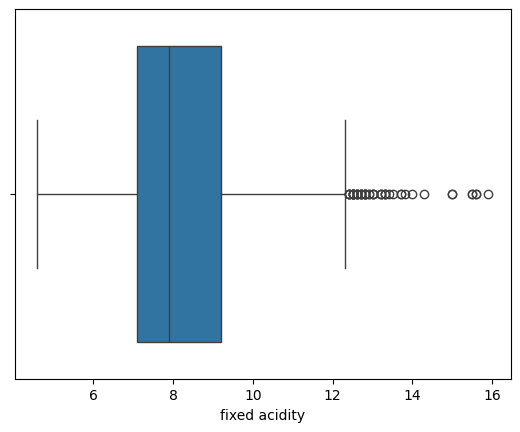

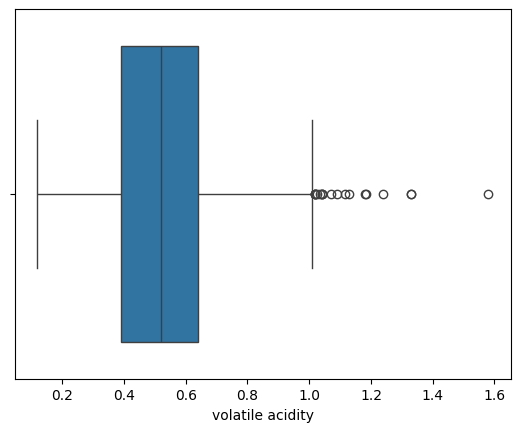

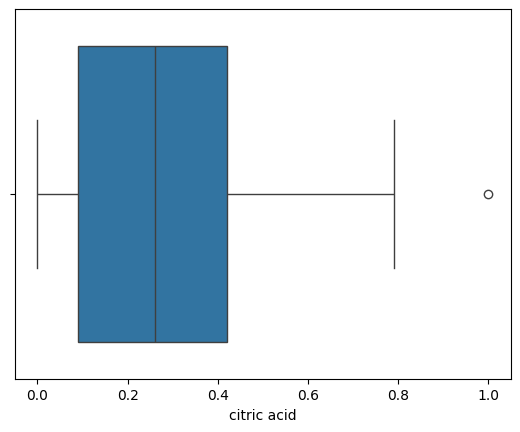

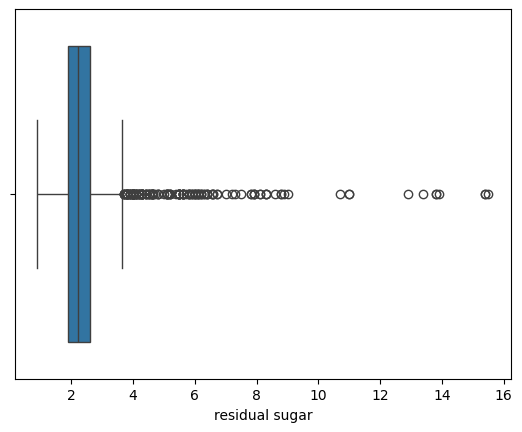

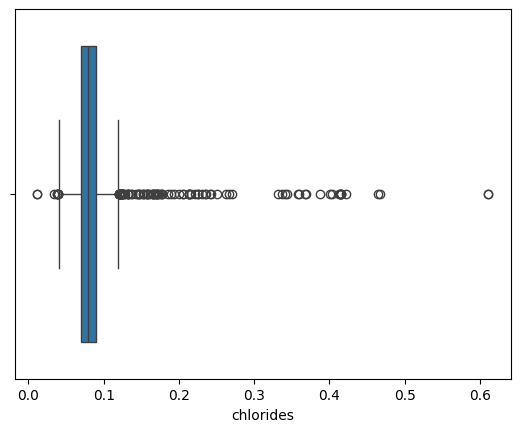

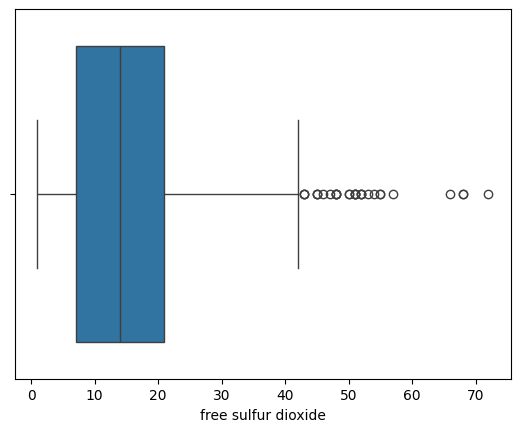

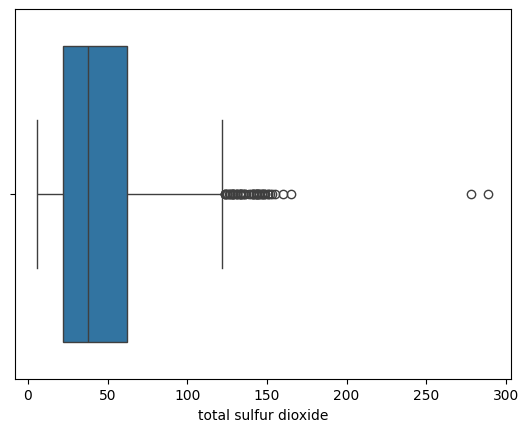

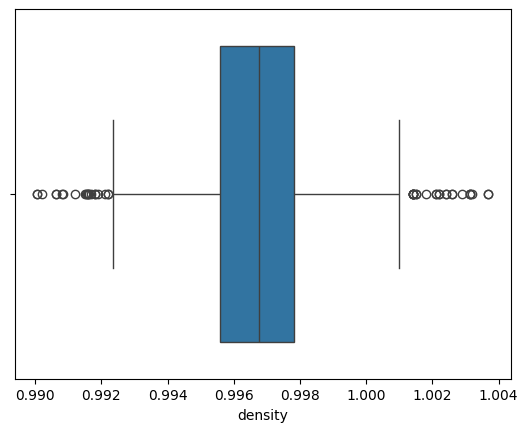

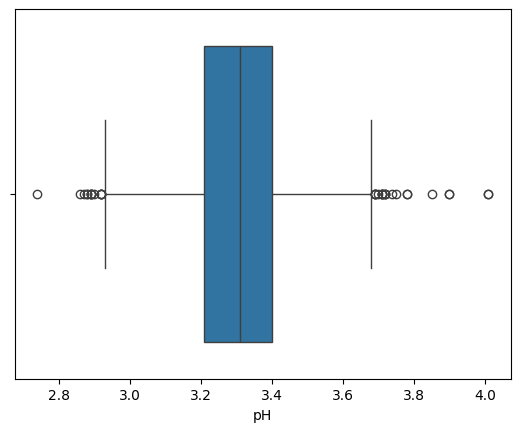

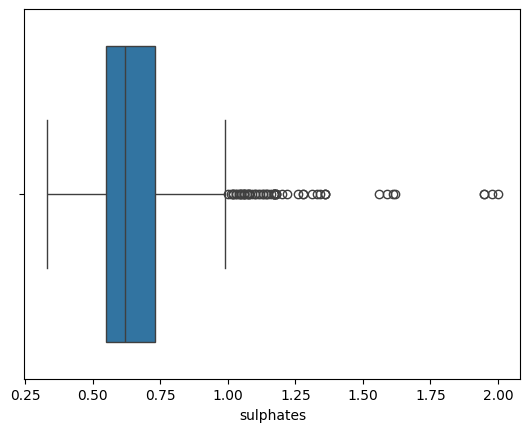

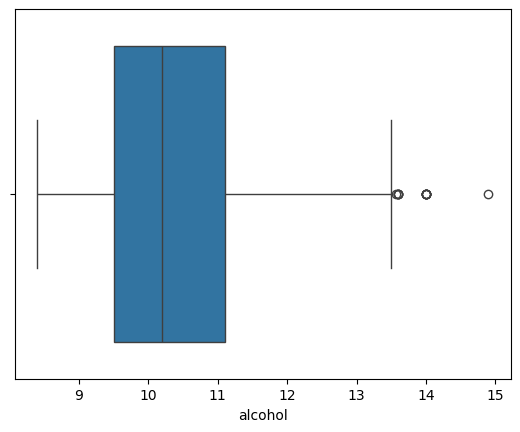

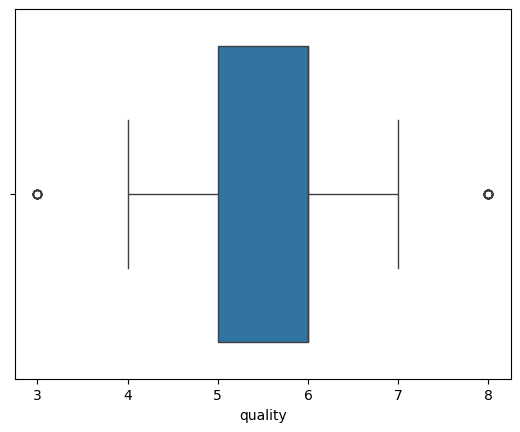

In [12]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [13]:
df.columns = df.columns.str.replace('fixed acidity', 'fixed_acidity')

In [14]:
q1 = df['fixed_acidity'].quantile(0.25)
q3 = df['fixed_acidity'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['fixed_acidity'] = df['fixed_acidity'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(12.349999999999998), np.float64(3.95))

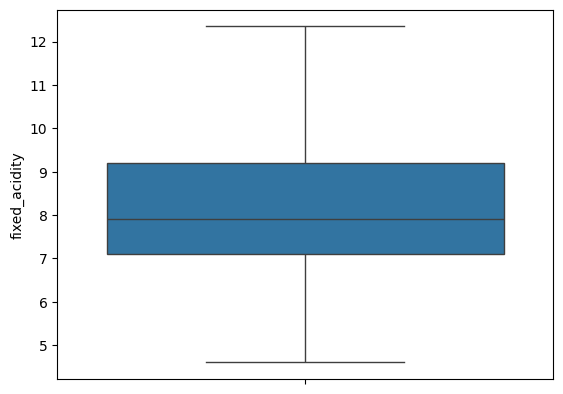

In [15]:
sns.boxplot(df['fixed_acidity'])
plt.show()

In [16]:
q1 = df['volatile acidity'].quantile(0.25)
q3 = df['volatile acidity'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['volatile acidity'] = df['volatile acidity'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(1.0150000000000001), np.float64(0.015000000000000013))

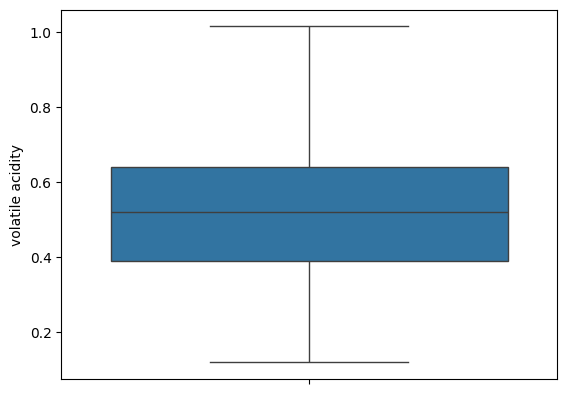

In [17]:
sns.boxplot(df['volatile acidity'])
plt.show()

In [18]:
q1 = df['citric acid'].quantile(0.25)
q3 = df['citric acid'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['citric acid'] = df['citric acid'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(0.9149999999999999), np.float64(-0.4049999999999999))

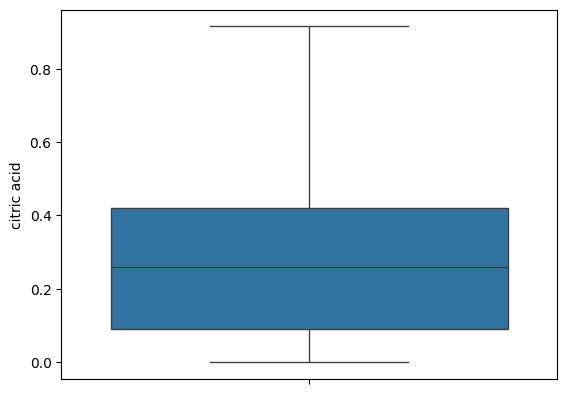

In [19]:
sns.boxplot(df['citric acid'])
plt.show()

In [20]:
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['residual sugar'] = df['residual sugar'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(3.6500000000000004), np.float64(0.8499999999999996))

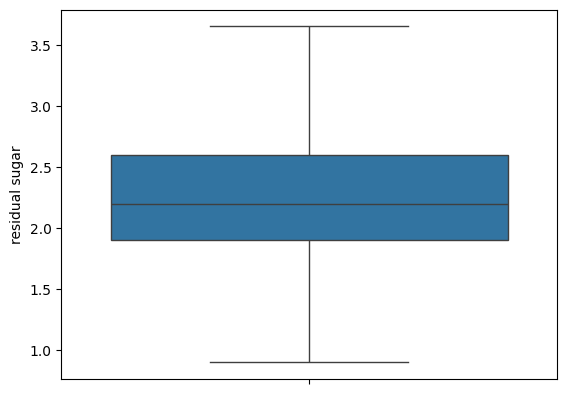

In [21]:
sns.boxplot(df['residual sugar'])
plt.show()

In [22]:
q1 = df['density'].quantile(0.25)
q3 = df['density'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['density'] = df['density'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(1.0011875), np.float64(0.9922475000000001))

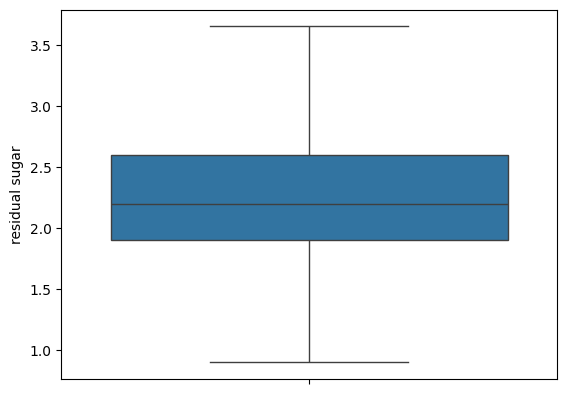

In [23]:
sns.boxplot(df['residual sugar'])
plt.show()

In [24]:
def clip_outliers(df):       #holl data sets clip
    for col in df.select_dtypes(include=np.number):  # Apply only to numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Apply the function
df11 = clip_outliers(df)

print(df11)

      fixed_acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

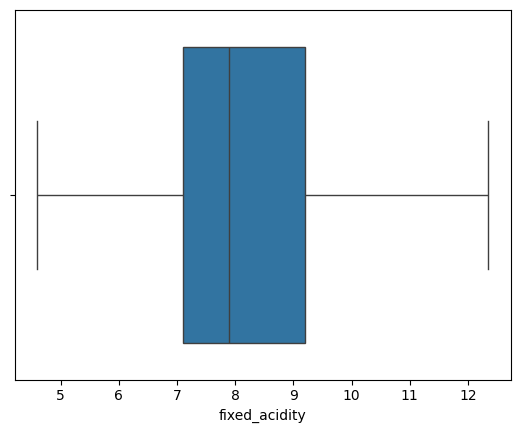

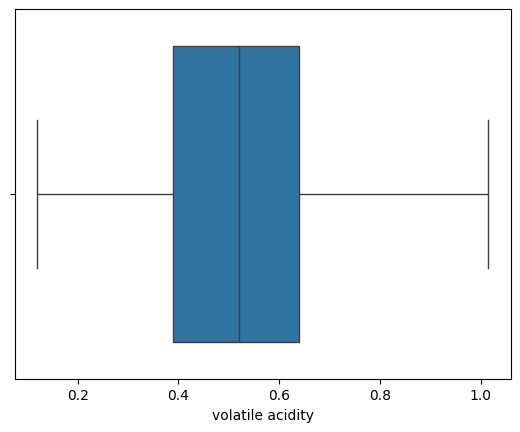

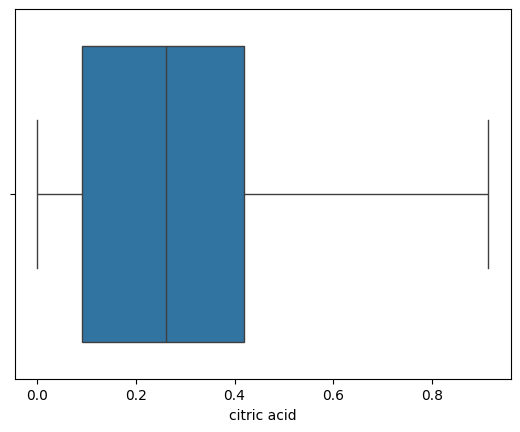

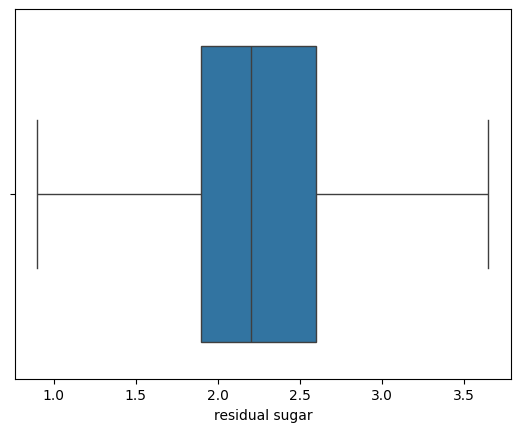

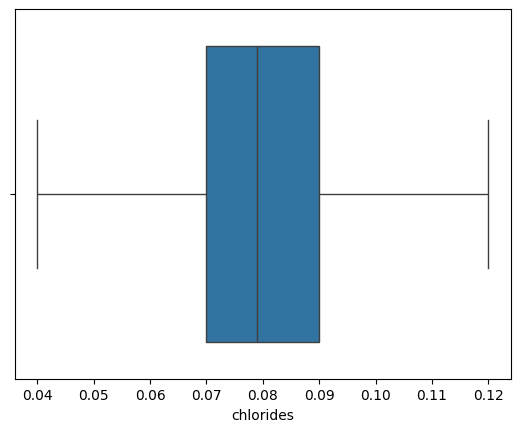

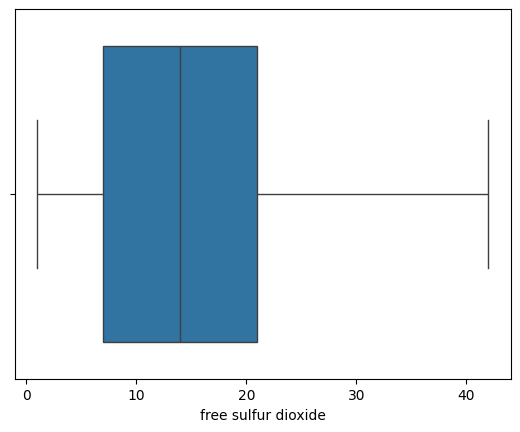

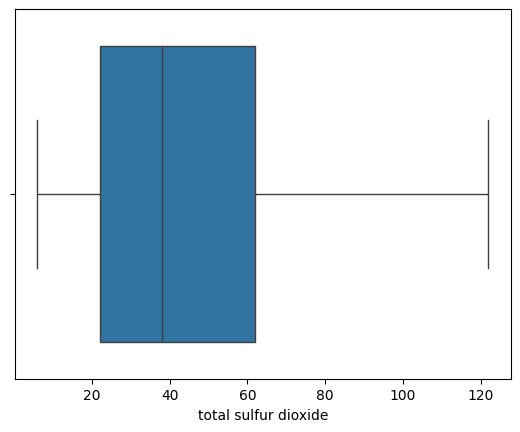

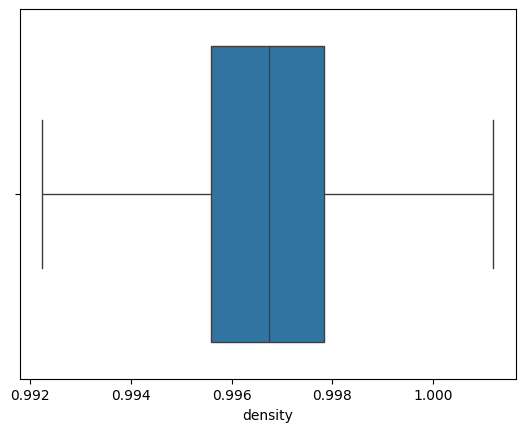

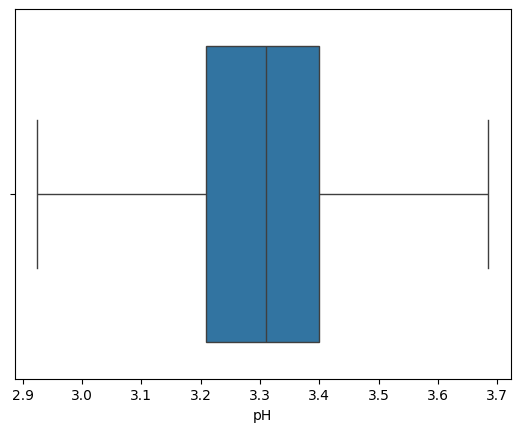

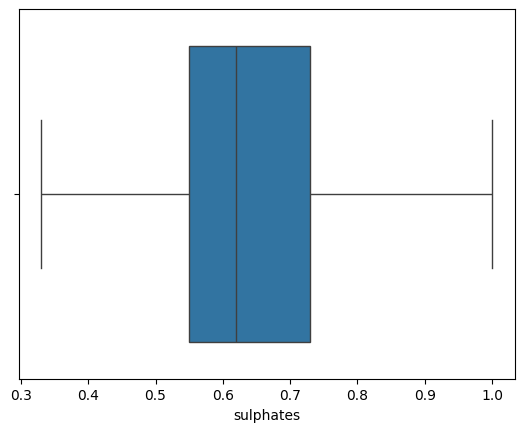

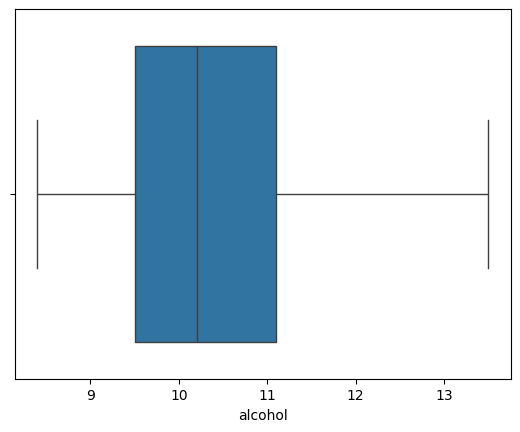

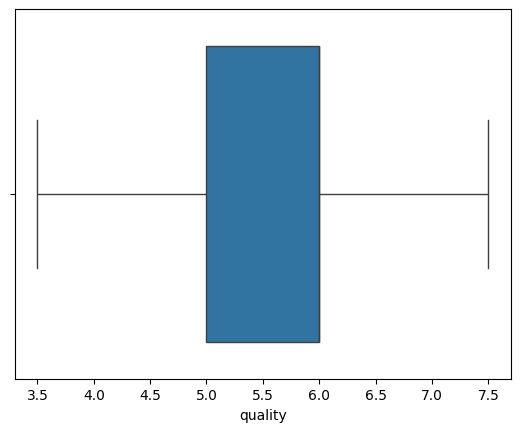

In [25]:
for i in df11.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df11[i])        
    plt.show()

In [26]:
df11.shape


(1599, 12)

In [27]:
df.shape


(1599, 12)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled)

      fixed_acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.361290          0.648045     0.000000        0.363636     0.4500   
1          0.412903          0.849162     0.000000        0.618182     0.7250   
2          0.412903          0.715084     0.043716        0.509091     0.6500   
3          0.851613          0.178771     0.612022        0.363636     0.4375   
4          0.361290          0.648045     0.000000        0.363636     0.4500   
...             ...               ...          ...             ...        ...   
1594       0.206452          0.536313     0.087432        0.400000     0.6250   
1595       0.167742          0.480447     0.109290        0.472727     0.2750   
1596       0.219355          0.435754     0.142077        0.509091     0.4500   
1597       0.167742          0.586592     0.131148        0.400000     0.4375   
1598       0.180645          0.212291     0.513661        0.981818     0.3375   

      free sulfur dioxide  

In [29]:
from sklearn.model_selection import train_test_split
x=df.drop('quality',axis=1)
y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # 42 is best for better accuracy
print("Train set:",x_train.shape,y_train.shape)
print("Test set:",x_test.shape,y_train.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (1279,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Create and train the regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model evaluation
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.4893359981852857
MSE: 0.35935564441096374
R² Score: 0.41433340249745043


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Train Decision Tree Refressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

dt_pred=dt_model.predict(x_test)
print("Descision Tree Regression")
print("MSE:",mean_absolute_error(y_test,dt_pred))
print("R2 Score:",r2_score(y_test,dt_pred))

Descision Tree Regression
MSE: 0.4671875
R2 Score: -0.040250831595868286


In [33]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

rf_preds=rf_model.predict(x_test)
print("\n Random Forest Performance")
print("MSE:",mean_absolute_error(y_test,rf_preds))
print("R2 Score:",r2_score(y_test,rf_preds))


 Random Forest Performance
MSE: 0.4115937499999999
R2 Score: 0.5432860848943992


In [34]:
summary=pd.DataFrame({
    'Actual MPG':y_test,
    'Decision Tree Prediction':dt_pred,
    'Random forest prediction':rf_preds,
})
print('\nPrediction Summary')
print(summary.head())


Prediction Summary
      Actual MPG  Decision Tree Prediction  Random forest prediction
803          6.0                       5.0                      5.31
124          5.0                       5.0                      5.25
350          6.0                       5.0                      5.46
682          5.0                       5.0                      5.27
1326         6.0                       6.0                      6.00


In [35]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

#Ridge Regression Model 

redge_model=Ridge(alpha=1.0) #Adjust alpha for regulation strenght 
redge_model.fit(x_train,y_train)

redge_preds=redge_model.predict(x_test)
print("\n Rigde Regression Performance")
print("MSE:",mean_absolute_error(y_test,redge_preds))
print("R2 Score:",r2_score(y_test,redge_preds))



 Rigde Regression Performance
MSE: 0.49218945242306
R2 Score: 0.40639702640541164


In [36]:
#Lasso Regression Model 

lasso_model=Lasso(alpha=0.01) #Lasso may need smaller alpha to avoid too much features elimination 
lasso_model.fit(x_train,y_train)

lasso_preds=lasso_model.predict(x_test)
print("\n  Lasso Regression Performance")
print("MSE:",mean_absolute_error(y_test,lasso_preds))
print("R2 Score:",r2_score(y_test,lasso_preds))



  Lasso Regression Performance
MSE: 0.5066767510113644
R2 Score: 0.3691869430016852


In [37]:
elastic_net__model=ElasticNet(alpha=0.01,l1_ratio=0.5) #l1_ratio=0.5 balance Ridge & Lassa
elastic_net__model.fit(x_train,y_train)

elastic_net_preds=elastic_net__model.predict(x_test)
print("\n  elastic net Regression Performance")
print("MSE:",mean_absolute_error(y_test,elastic_net_preds))
print("R2 Score:",r2_score(y_test,elastic_net_preds))


  elastic net Regression Performance
MSE: 0.5045029833264835
R2 Score: 0.37466543025968746


In [38]:
summary=pd.DataFrame({
    'Actual price':y_test,
    'Decision Tree Prediction':dt_pred,
    'Random forest prediction':rf_preds,
    'Ridge regression performance':redge_preds,
    'lasso regression performance':lasso_preds,
    'elastic net':elastic_net_preds,
})
print('\nPrediction Summary')
print(summary.head())


Prediction Summary
      Actual price  Decision Tree Prediction  Random forest prediction  \
803            6.0                       5.0                      5.31   
124            5.0                       5.0                      5.25   
350            6.0                       5.0                      5.46   
682            5.0                       5.0                      5.27   
1326           6.0                       6.0                      6.00   

      Ridge regression performance  lasso regression performance  elastic net  
803                       5.394026                      5.330244     5.326458  
124                       5.023221                      5.068559     5.066222  
350                       5.806375                      5.714044     5.732470  
682                       5.435567                      5.503445     5.495134  
1326                      5.689836                      5.696969     5.699928  


In [39]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
#import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Gradient Boosting Regression 

gbr =GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)
print("Gradient Boosting RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Gradient Boosting RMSE: 0.575033031804616
